In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas
import geopandas as gpd
import datetime as dt
import time
import fiona
from scipy.spatial import ConvexHull
from scipy.spatial.transform import Rotation as R

#from shapely import from_wkt
from shapely.geometry import MultiPolygon, MultiLineString, LineString, shape, Point
from data.test_data_2d import barriers, pts, example_route, example_space, islas
START, END = pts['bc'], pts['tc']

In [4]:
# STATISTICS
import numpy as np
import pandas as pd
from scipy.stats import wilcoxon

data8  = pd.read_csv('logs/convergence/3d_clk_dc_ht8_gn500.csv')
data12  = pd.read_csv('logs/convergence/3d_clk_dc_ht12_gn500.csv')
data17  = pd.read_csv('logs/convergence/3d_clk_dc_ht17_gn500.csv')

# Calculate the Wilcoxon signed-rank test.
diff_low = wilcoxon(data8.best, data12.best)
diff_high = wilcoxon(data12.best, data17.best)
diff_all = wilcoxon(data8.best, data17.best)


In [2]:
diff_low

WilcoxonResult(statistic=4221250.0, pvalue=5.592637215013689e-26)

In [7]:
data300  = pd.read_csv('logs/convergence/3d_clk_bbc_pop300.csv')
data500  = pd.read_csv('logs/convergence/3d_clk_bbc_pop500.csv')
data1000 = pd.read_csv('logs/convergence/3d_clk_bbc_pop1000.csv')
data2000 = pd.read_csv('logs/convergence/3d_clk_bbc_pop2000.csv')

# Calculate the Wilcoxon signed-rank test.
diff_low = wilcoxon(data500.best, data1000.best)
diff_high = wilcoxon(data1000.best, data2000.best)
diff_lower = wilcoxon(data300.best, data500.best)

In [20]:
diff_higher

WilcoxonResult(statistic=3595034.0, pvalue=0.0003198804155452017)

In [17]:
data0  = pd.read_csv('logs/convergence/3d_bh_elit0.csv')
data1  = pd.read_csv('logs/convergence/3d_bh_elit1.csv')
data3 = pd.read_csv('logs/convergence/3d_bh_elit3.csv')
data10 = pd.read_csv('logs/convergence/3d_bh_elit10.csv')

# Calculate the Wilcoxon signed-rank test.
diff_low = wilcoxon(data0.best, data1.best)
diff_high = wilcoxon(data0.best, data3.best)
diff_higher = wilcoxon(data0.best, data10.best)

In [16]:
data_trn  = pd.read_csv('logs/convergence/3d_clk_bbc_sglTourn.csv')
data_dbl  = pd.read_csv('logs/convergence/3d_clk_bbc_dblTourn.csv')

# Calculate the Wilcoxon signed-rank test.
diff = wilcoxon(data_trn.best, data_dbl.best)
diff

WilcoxonResult(statistic=18684.0, pvalue=1.3232843594669912e-130)

In [28]:
cx2  = pd.read_csv('logs/convergence/3d_clk_dc_cx2.csv')
cx5  = pd.read_csv('logs/convergence/3d_clk_dc_cx5.csv')
cx9  = pd.read_csv('logs/convergence/3d_clk_dc_cx9.csv')

# Calculate the Wilcoxon signed-rank test.
diff_low = wilcoxon(cx2.best, cx5.best)
diff_high = wilcoxon(cx2.best, cx9.best)
#print(diff_low, diff_high)

In [32]:
diff_low

WilcoxonResult(statistic=1048963.0, pvalue=1.2051764428385924e-31)

In [30]:
mut5  = pd.read_csv('logs/convergence/3d_clk_dc_mut5.csv')
mut10  = pd.read_csv('logs/convergence/3d_clk_dc_cx5.csv')
mut25  = pd.read_csv('logs/convergence/3d_clk_dc_mut25.csv')

# Calculate the Wilcoxon signed-rank test.
diff_low = wilcoxon(mut5.best, mut10.best)
diff_high = wilcoxon(mut10.best, mut25.best)

In [3]:
import numpy as np
nums = [17852,20993,16569,12571,11922,20647,10906,12041,16906,12025,18475]
np.std(nums) / np.mean(nums)

#pts = np.array([[0,0,0], [-1,-1,-1], [-1,-1,0], [-1,0,0]])
#np.linalg.norm(pts, axis=1)


0.2301704527736421

### Read Data

In [8]:
example_route = []
with fiona.open('./data/example_route_z.gpkg', layer='z_added') as layer:
    for n, feat in enumerate(layer):
        example_route.append(shape(feat['geometry']))
        if n == 0:
            print(feat)
example_route = MultiLineString(example_route)
#list(example_route.geoms[0].coords)
pt3 = Point(list(example_route.geoms[0].coords[0]))
list(example_route.geoms[0].coords)

{'type': 'Feature', 'id': '1', 'properties': OrderedDict([('Shape_Length', 55.23330595560781)]), 'geometry': {'type': 'LineString', 'coordinates': [(315849.94780001044, 67661.83929999918, 66.6358453077366), (315899.9477767271, 67638.37242083398, 66.6358453077366)]}}


[(315849.94780001044, 67661.83929999918, 66.6358453077366),
 (315899.9477767271, 67638.37242083398, 66.6358453077366)]

In [11]:
example_space = []
with fiona.open('./data/example_space_z_added.gpkg', layer='z_added') as layer:
    for n, feat in enumerate(layer):
        example_space.append(shape(feat['geometry']).geoms[0])
        #example_space.append(feat)
        if n == 0:
            print(type(feat))
example_space = MultiPolygon(example_space)
#print(example_space.geoms[0])

testline = LineString(((324400, 59800, 400),(326000, 60500, 200)))
#testline = LineString('LINESTRING Z ((325436.53 59875.73 600, 325436.64 59875.20 600')

#example_space.intersects(testline)
example_space.is_valid

<class 'dict'>


False

In [28]:
hull.points

array([[325436.5378,  59875.7357,    600.    ],
       [322943.6497,  57376.204 ,    600.    ],
       [322764.0622,  55128.9265,    600.    ],
       ...,
       [325445.03  ,  59886.4058,      0.    ],
       [325437.461 ,  59876.6726,      0.    ],
       [325436.5378,  59875.7357,      0.    ]])

In [43]:
def convex_hull(poly):
    high_pts = np.array(poly.exterior.coords)
    x, y = poly.exterior.xy
    z = np.zeros(len(x))
    print(f'{len(x)=}')
    low_pts = np.column_stack((x,y,z))
    pts = np.append(high_pts, low_pts, axis=0)
    return ConvexHull(pts)

#example_space.geoms[0].exterior.x
hull = convex_hull(example_space.geoms[3])



len(x)=36


num_verts=72
<class 'numpy.ndarray'>
<class 'numpy.int64'>


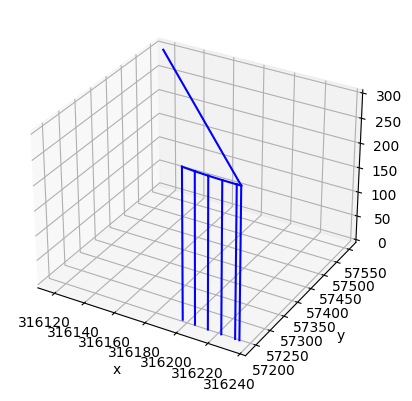

In [44]:
import numpy as np
import cdd as pcdd
import matplotlib.pyplot as plt

points= hull.points
num_verts = len(points)
print(f'{num_verts=}')

# to get the convex hull with cdd, one has to prepend a column of ones
vertices = np.hstack((np.ones((num_verts,1)), points))

# do the polyhedron
mat = pcdd.Matrix(vertices, linear=False, number_type="fraction") 
mat.rep_type = pcdd.RepType.GENERATOR
poly = pcdd.Polyhedron(mat)

# get the adjacent vertices of each vertex
adjacencies = [list(x) for x in poly.get_input_adjacency()]

# store the edges in a matrix (giving the indices of the points)
edges = [None]*(num_verts-1)
for i,indices in enumerate(adjacencies[:-1]):
    indices = list(filter(lambda x: x>i, indices))
    l = len(indices)
    col1 = np.full((l, 1), i)
    indices = np.reshape(indices, (l, 1))
    edges[i] = np.hstack((col1, indices))
Edges = np.vstack(tuple(edges)).astype(int)

# plot
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

print(type(Edges[:,0]))
print(type(Edges[:,0][0]))

start = points[Edges[:,0]]
end = points[Edges[:,1]]

for i in range(12):
    ax.plot(
        [start[i,0], end[i,0]], 
        [start[i,1], end[i,1]], 
        [start[i,2], end[i,2]],
        "blue"
    )

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

#ax.set_xlim3d(-1,5)
#ax.set_ylim3d(-1,5)
#ax.set_zlim3d(-1,5)
#
plt.show()

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'shapely.geometry.linestring.LineString'>
<class 'pandas.core.series.Series'>
LINESTRING Z (324400 59800 400, 326000 60500 200)
LINESTRING Z (324400 59800 400, 325074.870583233 60095.255880164455 457.82058854793627)
not_int=52


<AxesSubplot: >

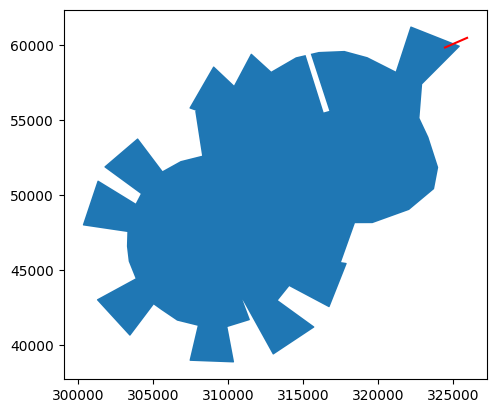

In [24]:
def within(x, lower, upper):
    # this is the right way:
    return x >= lower and x <= upper
not_int = 0
fig, ax = plt.subplots() 
example_space = gpd.read_file('./data/example_space_z_added.gpkg', layer='z_added')
#all(example_space.is_valid)
print(type(example_space))
print(type(testline))
for i, bar in example_space.iterrows():
    if bar['geometry'].intersects(testline):
        print(type(example_space.iloc[i]))
        gpd.GeoSeries(bar['geometry']).plot(ax=ax)
        inter = bar['geometry'].intersection(testline)
        print(testline)
        print(inter)
        if within(np.mean([coord[2] for coord in inter.coords]), 0, 300):
            print('***')
    else:
        not_int += 1
print(f'{not_int=}')
#example_space.plot(ax=ax)
gpd.GeoSeries(testline).plot(color='r', ax=ax)

In [27]:
i = np.array([[START.x, START.y],[END.x, END.y]])
#print(i)
print(np.column_stack(i))
p,q = np.column_stack(i)
p

[[291107.6 292653.3]
 [ 53789.1  48962.3]]


array([291107.6, 292653.3])

## Vector Rotation

In [6]:
def align_vectors(a, b):
    b = b / np.linalg.norm(b) # normalize a
    a = a / np.linalg.norm(a) # normalize b
    v = np.cross(a, b)
    # s = np.linalg.norm(v)
    c = np.dot(a, b)

    v1, v2, v3 = v
    h = 1 / (1 + c)

    Vmat = np.array([[0, -v3, v2],
                  [v3, 0, -v1],
                  [-v2, v1, 0]])

    R = np.eye(3, dtype=np.float64) + Vmat + (Vmat.dot(Vmat) * h)
    return R


def angle(a, b):
    """Angle between vectors"""
    a = a / np.linalg.norm(a)
    b = b / np.linalg.norm(b)
    return np.arccos(a.dot(b))

point = np.array([-0.02, 1.004, -0.02])
direction = np.array([1., 0., 0.])
rotation = align_vectors(point, direction)

# Rotate point in align with direction. The result vector is aligned with direction
result = rotation.dot(point)
print(point)
print('Angle:', angle(direction, point)) # 0.0
print('Length:', np.isclose(np.linalg.norm(point), np.linalg.norm(a))) # True


# Rotate direction by the matrix, point does not align with direction but the angle between the original vector (direction) and the result2 are the same.
result2 = rotation.dot(direction)
print(result2)
print('Same Angle:', np.isclose(angle(point,result), angle(direction,result2))) # True
print('Length:', np.isclose(np.linalg.norm(direction), np.linalg.norm(result2))) # True


[ 1.00439833e+00 -2.70616862e-16  6.93889390e-18]
Angle: 1.5907100615876228
Length: True
[-0.01991242 -0.99960342  0.01991242]
Same Angle: True
Length: True


In [16]:
def rotate(line, dest):
    # ROTATION:
    # Endpoints:
    ((ax, ay, az), (bx, by, bz)) = dest
    (px, py, pz,_), (qx, qy, qz,_) = line[0], line[-1]
    # = = = = = about z:
    line_angle = np.arctan2(qy - py, qx - px)
    dest_angle = np.arctan2(by - ay, bx - ax)
    theta = dest_angle - line_angle
    # negate, to rotate c-clockwise
    theta *= -1
    print(f'Delta theta about z-axis: {np.rad2deg(theta):.2f}°')
    c = np.cos(theta)
    s = np.sin(theta)
    rot_mat_z = np.array([[c,-s,0,0],
                        [s,c,0,0],
                        [0,0,1,0],
                        [0,0,0,1]])

    #rot_mat_z = np.array([[c,-s,0],
    #                    [s,c,0],
    #                    [0,0,1]])

    post_z = line.dot(rot_mat_z)
    # transform the endpoint, before the next rotation:
    #(qx, qy, qz, _) = np.array([qx, qy, qz, 1]).dot(rot_mat_z)
    (qx, qy, qz, _) = post_z[-1]



    # = = = = = about y:
    line_angle = np.arctan2(qx - px, qz - pz)
    dest_angle = np.arctan2(bx - ax, bz - az)
    theta = dest_angle - line_angle
    theta *= -1
    print(f'Delta theta about y-axis: {np.rad2deg(theta):.2f}°')
    c = np.cos(theta)
    s = np.sin(theta)
    rot_mat_y = np.array([[c,0,s,0],
                        [0,1,0,0],
                        [-s,0,c,0],
                        [0,0,0,1]])
    #rot_mat_y = np.array([[c,0,s],
    #                    [0,1,0],
    #                    [-s,0,c]])


    post_y = post_z.dot(rot_mat_y)
    # transform the endpoint, before the next rotation:
    #(qx, qy, qz, _) = np.array([qx, qy, qz, 1]).dot(rot_mat_y)
    (qx, qy, qz, _) = post_y[-1]


    # = = = = = about x:
    line_angle = np.arctan2(qz - pz, qy - py)
    dest_angle = np.arctan2(bz - az, by - ay)
    theta = dest_angle - line_angle
    theta *= -1
    print(f'Delta theta about x-axis: {np.rad2deg(theta):.2f}°')
    c = np.cos(theta)
    s = np.sin(theta)
    rot_mat_x = np.array([[1,0,0,0],
                        [0,c,-s,0],
                        [0,s,c,0],
                        [0,0,0,1]])
    #rot_mat_x = np.array([[1,0,0],
    #                    [0,c,-s],
    #                    [0,s,c]])




    post_x = post_y.dot(rot_mat_x)
    #(qx, qy, qz, _) = post_x[-1]






    rotation_matrix = rot_mat_z @ rot_mat_y @ rot_mat_x
    


    # TRANSFORMATION:
    transform_matrix = rotation_matrix
    line = np.array([np.array(coord_set).dot(transform_matrix) for coord_set in zip(line[:,0], line[:,1], line[:,2], np.ones(100))])
    return line[:,0:3]








# ONCE AND FOR ALL, CAN ALIGNMENT BY ROTATION IN 3D BE ACHIEVED WITH 3 CONSECUTIVE 2D ROTATIONS?

point = np.array([[0,0,0,0],[24,34,17,0]])

dest = np.array([[0,0,0],[17,24,34]])

route = rotate(point, dest)
print(route)
print(f'offset from true endpoint: {np.linalg.norm(dest[-1] - route[-1])}\n({dest[-1]-route[-1]})')

Delta theta about z-axis: 0.09°
Delta theta about y-axis: 28.19°
Delta theta about x-axis: -16.98°
[[ 0.          0.          0.        ]
 [13.17321683 24.78709135 35.11504608]]
offset from true endpoint: 4.062894286106963
([ 3.82678317 -0.78709135 -1.11504608])


In [4]:
a = np.array([24,34,17])
b = np.array([17,24,34])
direction = np.array([-0.02, 1.004, -0.02])
point = 1000 * np.array([-0.02, 1.004, -0.02])

def align_vectors(a, b):
     v = np.cross(a, b)
     s = np.linalg.norm(v)
     c = np.dot(a, b)

     v1, v2, v3 = v
     h = 1 / (1 + c)

     Vmat = np.array([[0, -v3, v2],
                      [v3, 0, -v1],
                      [-v2, v1, 0]])

     R = np.eye(3, dtype=np.float64) + Vmat + (Vmat.dot(Vmat) * h)
     return R

Ralign = align_vectors(a, direction)

result = Ralign.dot(point)
result

array([-24356.5464525 , -27022.62888449, -17294.8344525 ])

In [12]:
p1, p2 = rotation
print(p1)
print(p2)
rotation[0].as_rotvec()

0.1357816691600539


array([-0.26278206,  0.        ,  1.75509732])

Angle: 1.7478094723139002
Length: True
[-0.17609018  0.968496   -0.17609018]
Same Angle: True
Length: True


/tmp/ipykernel_3158/131012636.py:9: UserWarning: Optimal rotation is not uniquely or poorly defined for the given sets of vectors.
  rotation = R.align_vectors(np.reshape(point, (1, -1)),


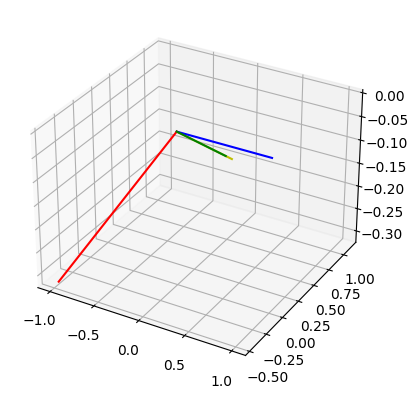

In [6]:
from scipy.spatial.transform import Rotation as R
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

point = np.array([-0.2, 1.1, -0.2])
direction = np.array([1., 0., 0.])
#rotation = R.align_vectors(point, direction)

rotation = R.align_vectors(np.reshape(point, (1, -1)),
                    np.reshape(direction, (1, -1)))
result = rotation[0].apply(point)
print('Angle:', angle(direction, point)) # 0.0
print('Length:', np.isclose(np.linalg.norm(point), np.linalg.norm(result))) # True
result2 = rotation[0].apply(direction)
print(result2)
print('Same Angle:', np.isclose(angle(point,result), angle(direction,result2))) # True
print('Length:', np.isclose(np.linalg.norm(direction), np.linalg.norm(result2))) # True


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot([0,point[0]],[0,point[1]], [0,point[2]], color='y')
ax.plot([0,direction[0]],[0,direction[1]], [0,direction[2]], color='b')
ax.plot([0,result[0]],[0,result[1]], [0,result[2]], color='r')
ax.plot([0,result2[0]],[0,result2[1]], [0,result2[2]], color='g')

[ 1.3625  -0.39875  0.0725 ]
Angle: 1.7478094723139002
Length: False
[-0.5625 -1.1     0.2   ]
Same Angle: True
Length: False


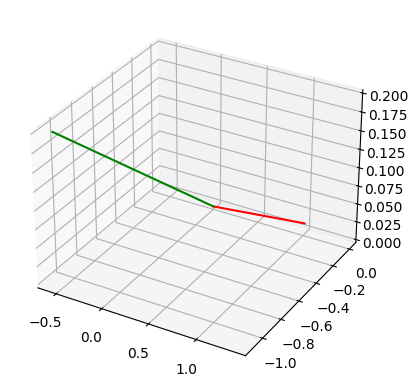

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d


def angle(a, b):
    """Angle between vectors"""
    a = a / np.linalg.norm(a)
    b = b / np.linalg.norm(b)
    return np.arccos(a.dot(b))

point = np.array([-0.2, 1.1, -0.2])
direction = np.array([1., 0., 0.])
rotation = align_vectors(point, direction)

# Rotate point in align with direction. The result vector is aligned with direction
result = rotation.dot(point)
print(result)
print('Angle:', angle(direction, point)) # 0.0
print('Length:', np.isclose(np.linalg.norm(point), np.linalg.norm(result))) # True


# Rotate direction by the matrix, result does not align with direction but the 
# angle between the original vector (direction) and the result2 are the same.
result2 = rotation.dot(direction)
print(result2)
print('Same Angle:', np.isclose(angle(point,result), angle(direction,result2))) # True
print('Length:', np.isclose(np.linalg.norm(direction), np.linalg.norm(result2))) # True


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot([0,result[0]],[0,result[1]], [0,result[2]], color='r')
ax.plot([0,result2[0]],[0,result2[1]], [0,result2[2]], color='g')


## 3D Plotting

In [6]:
from shapely import MultiPoint, wkt

points = MultiPoint([[0.0, 0.0, 1.1], [1.0, 1.0, 2.2]])

wkt.dumps(points)

'MULTIPOINT Z (0.0000000000000000 0.0000000000000000 1.1000000000000001, 1.0000000000000000 1.0000000000000000 2.2000000000000002)'

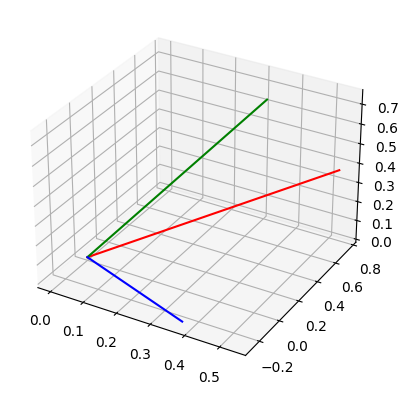

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

a = np.array([24,34,17])
b = np.array([17,24,34])
a = a / np.linalg.norm(a)
b = b / np.linalg.norm(b)
v = np.cross(a, b)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot([0,a[0]],[0,a[1]], [0,a[2]], color='r')
ax.plot([0,b[0]],[0,b[1]], [0,b[2]], color='g')
ax.plot([0,v[0]],[0,v[1]], [0,v[2]], color='b')

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy.spatial.transform import Rotation as R

a = np.array([24,34,17])
b = np.array([17,24,34])
a = a / np.linalg.norm(a)
b = b / np.linalg.norm(b)

rot = R.align_vectors(np.reshape(b, (1, -1)),
                    np.reshape(a, (1, -1)))
#rot[0].as_matrix()

a2 = rot[0].apply(a)

print(f'rotated a from {a} to {a2}\nb is at {b}')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot([0,a[0]],[0,a[1]], [0,a[2]], color='r')
ax.plot([0,b[0]],[0,b[1]], [0,b[2]], color='g')
ax.plot([0,v[0]],[0,v[1]], [0,v[2]], color='b')
plt.show()

rotated a from [0.53386086 0.75630289 0.37815145] to [0.37815145 0.53386086 0.75630289]
b is at [0.37815145 0.53386086 0.75630289]


## 3D Intersection

In [ ]:
import numpy as np
from scipy.spatial import ConvexHull
from scipy.optimize import linprog
from data.test_data_3d import line, test_hull_pts
from numpy import zeros, ones, arange, asarray, concatenate
from numpy.linalg import norm
from scipy.spatial import ConvexHull, Delaunay
from data.test_data_3d import pointset1, pointset2, int_line, nonint_line, above_line
import skgeom as sg

: 

In [1]:


def pnt_in_cvex_hull_1(hull, pnt):
    '''
    Checks if `pnt` is inside the convex hull.
    `hull` -- a QHull ConvexHull object
    `pnt` -- point array of shape (3,)
    '''
    new_hull = ConvexHull(concatenate((hull.points, [pnt])))
    if np.array_equal(new_hull.vertices, hull.vertices): 
        return True
    return False


def pnt_in_cvex_hull_2(hull_points, pnt):
    '''
    Given a set of points that defines a convex hull, uses simplex LP to determine
    whether point lies within hull.
    `hull_points` -- (N, 3) array of points defining the hull
    `pnt` -- point array of shape (3,)
    '''
    N = hull_points.shape[0]
    c = ones(N)
    A_eq = concatenate((hull_points, ones((N,1))), 1).T   # rows are x, y, z, 1
    b_eq = concatenate((pnt, (1,)))
    result = linprog(c, A_eq=A_eq, b_eq=b_eq)
    if result.success and c.dot(result.x) == 1.:
        return True
    return False

In [ ]:
print('checking containments...\nverts in hull:')
for n, vert in enumerate(line):
    if pnt_in_cvex_hull_1(ConvexHull(test_hull_pts), vert):
        print(n, end=' ')

In [7]:

poly = ConvexHull(pointset1)

# True if point lies within poly
for line in [int_line, nonint_line, above_line]:
    print(f'Itersects = {Delaunay(pointset1).find_simplex(line) >= 0}')
    print(f'Itersects = {Delaunay(pointset2).find_simplex(line) >= 0}')

Itersects = [ True False]
Itersects = [False  True]
Itersects = [False False]
Itersects = [False False]
Itersects = [False False]
Itersects = [False False]


In [1]:
import skgeom as sg
a = sg.Segment2(sg.Point2(3, 5), sg.Point2(0, -2))
b = sg.Segment2(sg.Point2(5, 3), sg.Point2(-2, -2))
i = sg.intersection(a, b)
print(i)

PointC2(0.882353, 0.0588235)


In [2]:
a = sg.Polyhedron_3([[0,100,10],[50,100,10],[50,50,10],[0,50,10],
                    [0,100,0],[50,100,0],[50,50,0],[0,50,0]])

TypeError: __init__(): incompatible constructor arguments. The following argument types are supported:
    1. skgeom._skgeom.Polyhedron_3()
    2. skgeom._skgeom.Polyhedron_3(arg0: skgeom._skgeom.Polyhedron_3)

Invoked with: [[0, 100, 10], [50, 100, 10], [50, 50, 10], [0, 50, 10], [0, 100, 0], [50, 100, 0], [50, 50, 0], [0, 50, 0]]

## Syntax Checks

In [15]:
import numpy as np

inter = np.array([['origin.x', 'origin.y'],
                ['destination.x','destination.y']])
inter = np.concatenate((inter, np.array([['origin.z', 'destination.z']]).T), axis=1)
inter

array([['origin.x', 'origin.y', 'origin.z'],
       ['destination.x', 'destination.y', 'destination.z']], dtype='<U13')